<h1 align="center">Matéria Condensada</h1>

### Gabriel Martins Sousa

<h2 align="center">Modelagem computacional do Alfa-Grafino</h2>

---

Esse é o *notebook* com os códigos para modelagem computacional da rede molecular do $\alpha$-grafino, utilizando o módulo `PythTB` para esquematização da estrutura, definição dos *hoppings* e calculo da estrutura de bandas.

In [1]:
import pythtb as tb
import matplotlib.pyplot as plt
import math
import numpy as np

### Modelagem da célula unitária

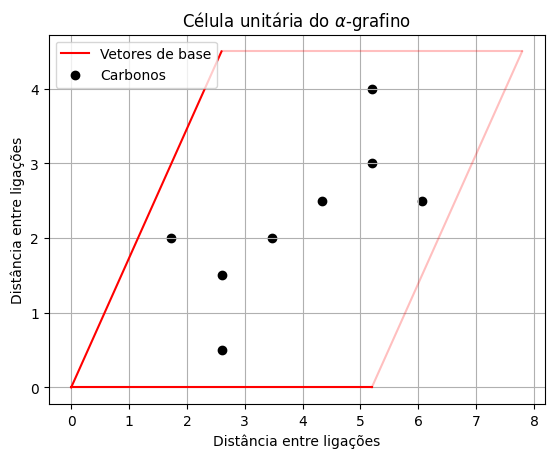

In [2]:
pi = math.pi
cos = math.cos
sen = math.sin
 
l = 1                    # Distância de uma ligação entre dois carbonos
a = 3*(3**(1/2))*l       # Módulo dos vetores de base
 
# Vetores de base
v1 = (a,0) 
v2 = (a/2, (3**(1/2)*a/2))
 
 
# Coordenadas dos átomos
c1 = (3*(3**(1/2))*l/2,l/2)
c2 = ((3**(1/2))*l, 2*l)
c3 = (3*l*cos(pi/6),3*l*sen(pi/6))
c4 = (4*l*cos(pi/6),4*l*sen(pi/6))
c5 = (5*l*cos(pi/6),5*l*sen(pi/6))
c6 = (6*l*cos(pi/6),6*l*sen(pi/6))
c7 = (7*(3**(1/2))*l/2,5*l/2)
c8 = (3*(3**(1/2))*l,4*l)
 
# Plot da célula unitária
x = [c[0] for c in [c1,c2,c3,c4,c5,c6,c7,c8]]
y = [c[1] for c in [c1,c2,c3,c4,c5,c6,c7,c8]]
 
plt.plot([0,v1[0]],[0,v1[1]], c= "r")
plt.plot([0,v2[0]],[0,v2[1]], c = "r", label = "Vetores de base")
 
plt.plot([v2[0],v1[0]+v2[0]],[v2[1],v2[1]], c= "r", alpha=0.25)
plt.plot([a,v2[0]+a],[0,v2[1]], c = "r", alpha=0.25)
 
# Plot dos átomos
plt.scatter(x, y, c = "black" , label = "Carbonos")
plt.xlabel("Distância entre ligações")
plt.ylabel("Distância entre ligações")
plt.title(r"Célula unitária do $\alpha$-grafino")
plt.legend()
plt.grid()
plt.savefig("Célula Unitária do a-grafino.png", dpi=300)
plt.show()

### Criação do modelo de TB para ligações não-relaxadas

In [3]:
c1 = (4/9, 1/9)
c2 = (1/9, 4/9)
c3 = (1/3, 1/3)
c4 = (4/9, 4/9)
c5 = (5/9, 5/9)
c6 = (2/3, 2/3)
c7 = (8/9, 5/9)
c8 = (5/9, 8/9)

# Vetores da célula 
lat = [[1, 0.0],
      [1/2, (3**(1/2)*1/2)]]

# Criação do modelo de TB em 2 dimensões
posicao=[c1,c2,c3,c4,c5,c6,c7,c8]
model1=tb.tb_model(2,2,lat, posicao)
model1.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 8
number of electronic states = 8
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.4444 ,  0.1111 ]
 #  1  ===>  [  0.1111 ,  0.4444 ]
 #  2  ===>  [  0.3333 ,  0.3333 ]
 #  3  ===>  [  0.4444 ,  0.4444 ]
 #  4  ===>  [  0.5556 ,  0.5556 ]
 #  5  ===>  [  0.6667 ,  0.6667 ]
 #  6  ===>  [  0.8889 ,  0.5556 ]
 #  7  ===>  [  0.5556 ,  0.8889 ]
site energies:
 #  0  ===>       0.0
 #  1  ===>       0.0
 #  2  ===>       0.0
 #  3  ===>       0.0
 #  4  ===>       0.0
 #  5  ===>       0.0
 #  6  ===>       0.0
 #  7  ===>       0.0
hoppings:
hopping distances:



### Determinação dos hoppings para as ligações não-relaxadas

<Figure size 6400x6400 with 0 Axes>

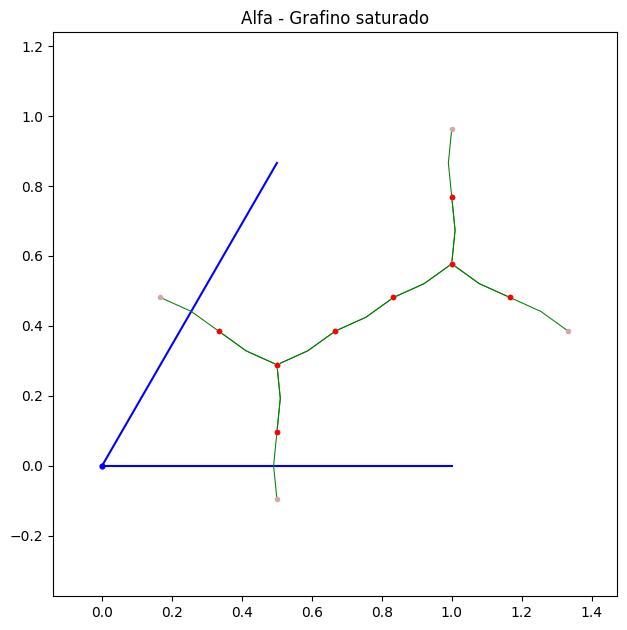

In [4]:
# Energia de hopping simples
t = -1

# Hoppings dentro da célula unitária
model1.set_hop(t, 0, 2, [ 0, 0])
model1.set_hop(t, 1, 2, [ 0, 0])
model1.set_hop(t, 2, 3, [ 0, 0])
model1.set_hop(t, 3, 4, [ 0, 0])
model1.set_hop(t, 4, 5, [ 0, 0])
model1.set_hop(t, 5, 6, [ 0, 0])
model1.set_hop(t, 5, 7, [ 0, 0])

# Hoppings para fora da célula unitária
model1.set_hop(t, 0, 7, [0, -1])
model1.set_hop(t, 1, 6, [-1, 0])

# Visualização
plt.figure(figsize=(8, 8), dpi=800)
model1.visualize(0, 1, draw_hoppings=True)
plt.title("Alfa - Grafino saturado")
plt.tight_layout()
plt.savefig("Alfa - Grafino saturado.png", dpi=300)
plt.show()

### Cálculo da estrutura de bandas 

----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.     ]
 [0.5     0.86603]]
k-space metric tensor
 [[ 1.33333 -0.66667]
 [-0.66667  1.33333]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.33333]
 [0.5     0.5    ]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[ 1.      -0.57735]
 [ 0.       1.1547 ]]
cartesian coordinates of nodes
 [[0.00000e+00 0.00000e+00]
 [6.66667e-01 1.56412e-17]
 [5.00000e-01 2.88675e-01]
 [0.00000e+00 0.00000e+00]]
list of segments:
  length = 0.66667  from  [0. 0.]  to  [0.66667 0.33333]
  length = 0.33333  from  [0.66667 0.33333]  to  [0.5 0.5]
  length = 0.57735  from  [0.5 0.5]  to  [0. 0.]
node distance list: [0.      0.66667 1.      1.57735]
node index list:    [  0  42  63 100]
----- k_path report end ------------



C:\Users\gabriel24036\AppData\Local\Temp\ipykernel_28796\1499576779.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


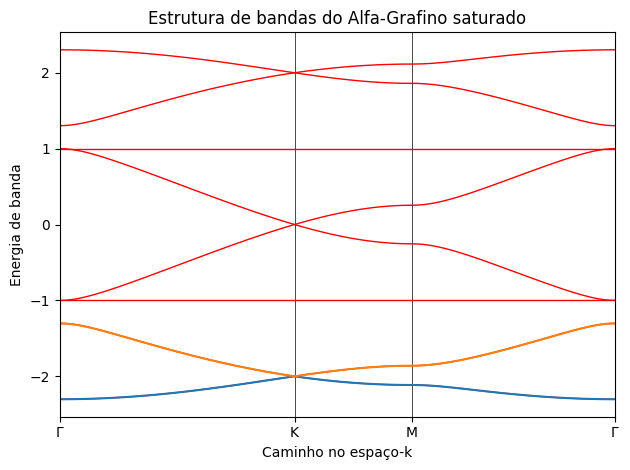

In [5]:
# Caminho no espaço-k entre os pontos de alta simetria
path = [[0.0, 0.0], [2/3, 1/3], [0.5, 0.5], [0.0, 0.0]]
labels = (r'$\Gamma$', 'K', 'M', r'$\Gamma$')

# Resolução do caminho e das energias
k_vec, k_dist, k_node = model1.k_path(path, 101)
evals = model1.solve_all(k_vec)

# Plot da estrutura de bandas
fig, ax = plt.subplots()
ax.set_xlim(k_node[0],k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(labels)

for n in range(len(k_node)):
    ax.axvline(x=k_node[n],linewidth=0.5, color='k')
    
for band in evals:
    ax.plot(k_dist, band, color='red', linewidth=1)

ax.set_title("Estrutura de bandas do Alfa-Grafino saturado")
ax.set_xlabel("Caminho no espaço-k")
ax.set_ylabel("Energia de banda")

ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])

fig.tight_layout()
fig.savefig("Estrutura de bandas do Alfa-Grafino saturado.png", dpi=300)
fig.show()

### Criação do modelo de TB para ligações relaxadas

In [6]:
model2=tb.tb_model(2,2,lat, posicao)
model2.display()

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 2
r-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 8
number of electronic states = 8
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ]
positions of orbitals:
 #  0  ===>  [  0.4444 ,  0.1111 ]
 #  1  ===>  [  0.1111 ,  0.4444 ]
 #  2  ===>  [  0.3333 ,  0.3333 ]
 #  3  ===>  [  0.4444 ,  0.4444 ]
 #  4  ===>  [  0.5556 ,  0.5556 ]
 #  5  ===>  [  0.6667 ,  0.6667 ]
 #  6  ===>  [  0.8889 ,  0.5556 ]
 #  7  ===>  [  0.5556 ,  0.8889 ]
site energies:
 #  0  ===>       0.0
 #  1  ===>       0.0
 #  2  ===>       0.0
 #  3  ===>       0.0
 #  4  ===>       0.0
 #  5  ===>       0.0
 #  6  ===>       0.0
 #  7  ===>       0.0
hoppings:
hopping distances:



### Determinação dos hoppings para as ligações relaxadas

<Figure size 6400x6400 with 0 Axes>

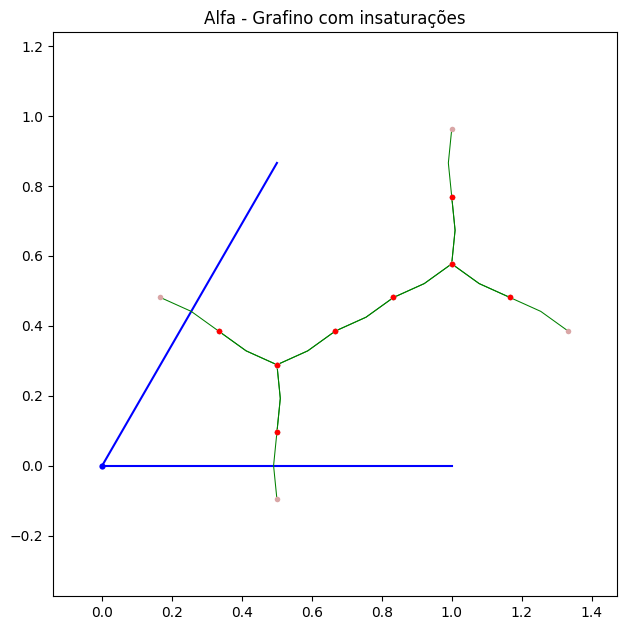

In [7]:
t1 = -2.7      # Ligação simples
t2 = -3.1      # Ligação dupla
t3 = -4.3      # Ligação tripla

# Hoppings dentro da célula unitária
model2.set_hop(t1, 0, 2, [ 0, 0])
model2.set_hop(t1, 1, 2, [ 0, 0])
model2.set_hop(t2, 2, 3, [ 0, 0])
model2.set_hop(t2, 3, 4, [ 0, 0])
model2.set_hop(t2, 4, 5, [ 0, 0])
model2.set_hop(t1, 5, 6, [ 0, 0])
model2.set_hop(t1, 5, 7, [ 0, 0])

# Hoppings para fora da célula unitária
model2.set_hop(t3, 0, 7, [0, -1])
model2.set_hop(t3, 1, 6, [-1, 0])

# Visualização
plt.figure(figsize=(8, 8), dpi=800)
model2.visualize(0, 1, draw_hoppings=True)
plt.title("Alfa - Grafino com insaturações")
plt.tight_layout()
plt.savefig("Alfa - Grafino com insaturações.png", dpi=300)
plt.show()

### Cálculo da estrutura de bandas 

----- k_path report begin ----------
real-space lattice vectors
 [[1.      0.     ]
 [0.5     0.86603]]
k-space metric tensor
 [[ 1.33333 -0.66667]
 [-0.66667  1.33333]]
internal coordinates of nodes
 [[0.      0.     ]
 [0.66667 0.33333]
 [0.5     0.5    ]
 [0.      0.     ]]
reciprocal-space lattice vectors
 [[ 1.      -0.57735]
 [ 0.       1.1547 ]]
cartesian coordinates of nodes
 [[0.00000e+00 0.00000e+00]
 [6.66667e-01 1.56412e-17]
 [5.00000e-01 2.88675e-01]
 [0.00000e+00 0.00000e+00]]
list of segments:
  length = 0.66667  from  [0. 0.]  to  [0.66667 0.33333]
  length = 0.33333  from  [0.66667 0.33333]  to  [0.5 0.5]
  length = 0.57735  from  [0.5 0.5]  to  [0. 0.]
node distance list: [0.      0.66667 1.      1.57735]
node index list:    [  0  42  63 100]
----- k_path report end ------------



C:\Users\gabriel24036\AppData\Local\Temp\ipykernel_28796\1989882015.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


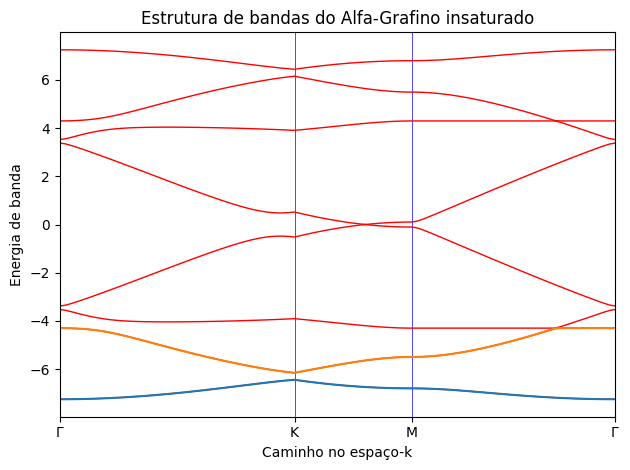

In [8]:
# Caminho no espaço-k entre os pontos de alta simetria
path = [[0.0, 0.0], [2/3, 1/3], [1/2, 1/2], [0.0, 0.0]]
labels = (r'$\Gamma$', 'K', 'M', r'$\Gamma$')

# Resolução do caminho e das energias
k_vec, k_dist, k_node = model2.k_path(path, 101)
evals = model2.solve_all(k_vec)

# Plot da estrutura de bandas
fig, ax = plt.subplots()
ax.set_xlim(k_node[0],k_node[-1])
ax.set_xticks(k_node)
ax.set_xticklabels(labels)
for n in range(len(k_node)):
    ax.axvline(x=k_node[n],linewidth=0.5, color='blue')
    
for band in evals:
    ax.plot(k_dist, band, color='red', linewidth=1)

ax.set_title("Estrutura de bandas do Alfa-Grafino insaturado")
ax.set_xlabel("Caminho no espaço-k")
ax.set_ylabel("Energia de banda")
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])
fig.tight_layout()
fig.savefig("Estrutura de bandas do Alfa-Grafino insaturado.png", dpi=300)
fig.show()